1) Реализовать алгоритм слияния n (n = 2 ** k) отсортированных списков (произвольной длины) в один отсортированный список.

2) С помощью Dask реализовать генерацию n отсортированных списков целых значений (для каждого списка задается собственная длина) и сохранение каждого списка в отдельный файл (в файле хранится 3 столбца: номер_спска, номер_по_порядку, значение. 

3) Применить решение задачи 1 для сортировки данных, сгенерированных в задаче 2

4) При помощи dask.delayed распараллелить решение задачи 1 и применить к данным, сгенерированным в задаче 2

5) Модифицировать 4 - обрабатывать данные тем же алгоритмом с помощью pandas.DataFrame

6) C помощью разработанного алгоритма и возможностей Dask.DataFrame отсортировать данные, которые обрабатывались на сминаере по Dask.DataFrame (столбцы: ,id,names,amount,new) по столбцу amount.

In [8]:
@delayed
def merge(list1, list2):
    result_list = []
    first_index, second_index = 0, 0
    
    while first_index < len(list1) and second_index < len(list2):
        if list1[first_index] < list2[second_index]:
            result_list.append(list1[first_index])
            first_index += 1
        else:
            result_list.append(list2[second_index])
            second_index += 1
        
    result_list.extend(list1[first_index:])
    result_list.extend(list2[second_index:])
    
    return result_list

In [9]:
b = merge([1, 2, 3, 8, 9], [3, 4, 5, 6, 7, 12])

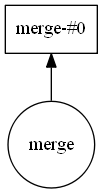

In [10]:
b.visualize()

In [27]:
b.compute()

[1, 2, 3, 3, 4, 5, 6, 7, 8, 9, 12]

In [21]:
def merge_many(n):
    if len(n) == 2:
        return merge(n[0], n[1])
    
    return merge(merge_many(n[:len(n) // 2]), merge_many(n[len(n) // 2:]))

In [28]:
b = merge_many([[1,2,3], [3, 4, 5, 6, 7], [1,2,3], [3, 4, 5, 6, 7], [1,2,3], [3, 4, 5, 6, 7], [1,2,3], [3, 4, 5, 6, 7]])

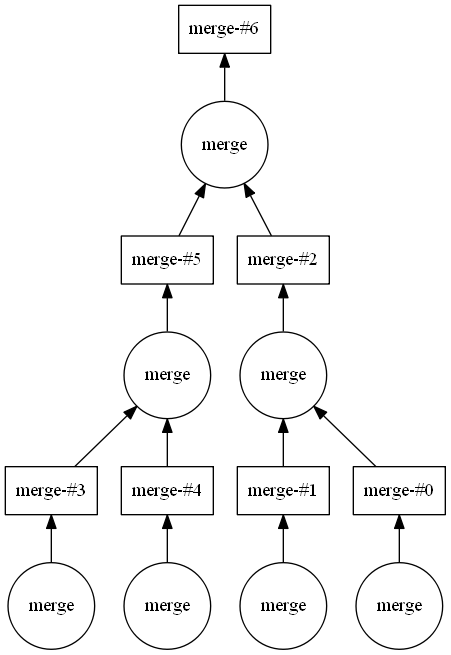

In [29]:
b.visualize()

In [ ]:
for i in range([[1,2,3], [3, 4, 5, 6, 7], [1,2,3], [3, 4, 5, 6, 7]])

In [20]:
b.compute()

Delayed('merge-a073b213-fad5-4ba7-9c26-c299ea65430f')

2 zadanie

In [1]:
import dask.array as da

In [2]:
import numpy as np

In [3]:
from dask import delayed
import h5py
import os
import dask
os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'

C:\Users\panow\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
path = 'arrays//'
filename = 'array'

In [5]:
@delayed
def generate_data(n, length, path, filename): 
    b = da.concatenate([np.zeros((length, 1)) + n, np.arange(length).reshape(-1, 1),
                        np.sort(np.random.randint(-1000, 1000, size=length)).reshape(-1, 1)], axis=1).astype(np.int)
    
    b.to_hdf5(path + '{}{}.h5'.format(filename, n), '1')
        

In [7]:
length = 5
n = 5

b = np.concatenate([np.zeros((length, 1)) + n, np.zeros((length, 1)),
                        np.sort(np.random.randint(-1000, 1000, size=length)).reshape(-1, 1)], axis=1) 

In [6]:
lists_of_params = [(i, int(np.random.randint(40000, 45000, size=1))) for i in range(32)]

In [7]:
results = []

for i in lists_of_params:
    results.append(generate_data(i[0], i[1], path, filename))

In [8]:
a = dask.compute(*results)

In [11]:
h5f = h5py.File('arrays//array0.h5','r')

In [12]:
h5f['1'][:]

array([[    0,     0, -1000],
       [    0,     1, -1000],
       [    0,     2, -1000],
       ...,
       [    0, 43416,   999],
       [    0, 43417,   999],
       [    0, 43418,   999]])

In [13]:
o = h5f['1']
array = da.from_array(o, chunks=50)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.20625 to fit


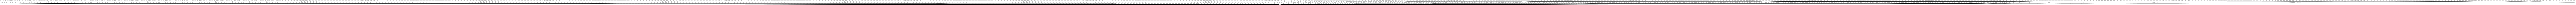

In [14]:
#array.visualize()

In [15]:
%%time
array.compute() 

Wall time: 599 ms


array([[    0,     0, -1000],
       [    0,     1, -1000],
       [    0,     2, -1000],
       ...,
       [    0, 43416,   999],
       [    0, 43417,   999],
       [    0, 43418,   999]])

3 задание

In [8]:
b = np.concatenate([np.zeros((length, 1)) + n, np.zeros((length, 1)),
                        np.sort(np.random.randint(-1000, 1000, size=length)).reshape(-1, 1)], axis=1) 

g = np.concatenate([np.zeros((6, 1)) + n, np.zeros((6, 1)),
                        np.sort(np.random.randint(-1000, 1000, size=6)).reshape(-1, 1)], axis=1) 

In [9]:
result = [b, g]

In [3]:
@delayed
def merge_on_key(list1, list2, key):
    result_list = []
    first_index, second_index = 0, 0
    
    while first_index < len(list1) and second_index < len(list2):
        if list1[first_index, key] < list2[second_index, key]:
            result_list.append(list1[first_index])
            first_index += 1
        else:
            result_list.append(list2[second_index])
            second_index += 1
        
    result_list.extend(list1[first_index:])
    result_list.extend(list2[second_index:])
    
    return np.asarray(result_list)

In [22]:
kek = merge_on_key(b, g, 2)

In [23]:
kek

array([[   5.,    0., -969.],
       [   5.,    0., -738.],
       [   5.,    0., -452.],
       [   5.,    0., -183.],
       [   5.,    0.,   18.],
       [   5.,    0.,  338.],
       [   5.,    0.,  642.],
       [   5.,    0.,  650.],
       [   5.,    0.,  676.],
       [   5.,    0.,  721.],
       [   5.,    0.,  843.]])

In [10]:
from os import listdir
from os.path import isfile, join

onlyfiles = [f for f in listdir(path)]

In [11]:
dask_arrays = []
for fn in onlyfiles:
    f = h5py.File(path + fn)
    d = f['1']
    array = da.from_array(d, chunks=50)
    dask_arrays.append(array)

In [12]:
def merge_many_on_key(n, key):
    if len(n) == 2:
        return merge_on_key(n[0], n[1], key)
    
    return merge_on_key(merge_many_on_key(n[:len(n) // 2], key), merge_many_on_key(n[len(n) // 2:], key), key)

In [29]:
%%time 
merge_many_on_key(dask_arrays, 2)

KeyboardInterrupt: 

In [13]:
b = merge_many_on_key(dask_arrays, 2)

In [ ]:
b.visualize()

In [14]:
%%time
c = dask.compute(b)

Wall time: 31 s


In [18]:
c[0].shape

(1336615, 3)

5 задание

In [10]:
import pandas as pd

In [11]:
pandas_b = pd.DataFrame(b)
pandas_g = pd.DataFrame(g)

In [12]:
pandas_b.columns = ['first', 'second', 'third']
pandas_g.columns = ['first', 'second', 'third']

In [15]:
@delayed
def merge_on_pandas_key(list1, list2, key):
    result_list = []
    first_index, second_index = 0, 0
    
    while first_index < len(list1) and second_index < len(list2):
        if list1[key].values[first_index] < list2[key].values[second_index]:
            result_list.append(list1.values[first_index])
            first_index += 1
        else:
            result_list.append(list2.values[second_index])
            second_index += 1
        
    result_list.extend(list1.values[first_index:])
    result_list.extend(list2.values[second_index:])
    
    return pd.DataFrame(result_list, columns=list1.columns)

In [16]:
dask.compute(merge_on_pandas_key(pandas_g, pandas_b, 'third'))[0]

,first,second,third
0,5.0,0.0,-993.0
1,5.0,0.0,-860.0
2,5.0,0.0,-774.0
3,5.0,0.0,-509.0
4,5.0,0.0,-457.0
5,5.0,0.0,-114.0
6,5.0,0.0,-17.0
7,5.0,0.0,55.0
8,5.0,0.0,450.0
9,5.0,0.0,647.0


In [21]:
def merge_many_on_pandas_key(n, key):
    if len(n) == 2:
        return merge_on_pandas_key(n[0], n[1], key)
    
    return merge_on_pandas_key(merge_many_on_pandas_key(n[:len(n) // 2], key),
                               merge_many_on_pandas_key(n[len(n) // 2:], key), key)

In [22]:
visual = merge_many_on_pandas_key([pandas_g, pandas_b, pandas_g, pandas_b, pandas_g, pandas_b, pandas_g, pandas_b], 'third')

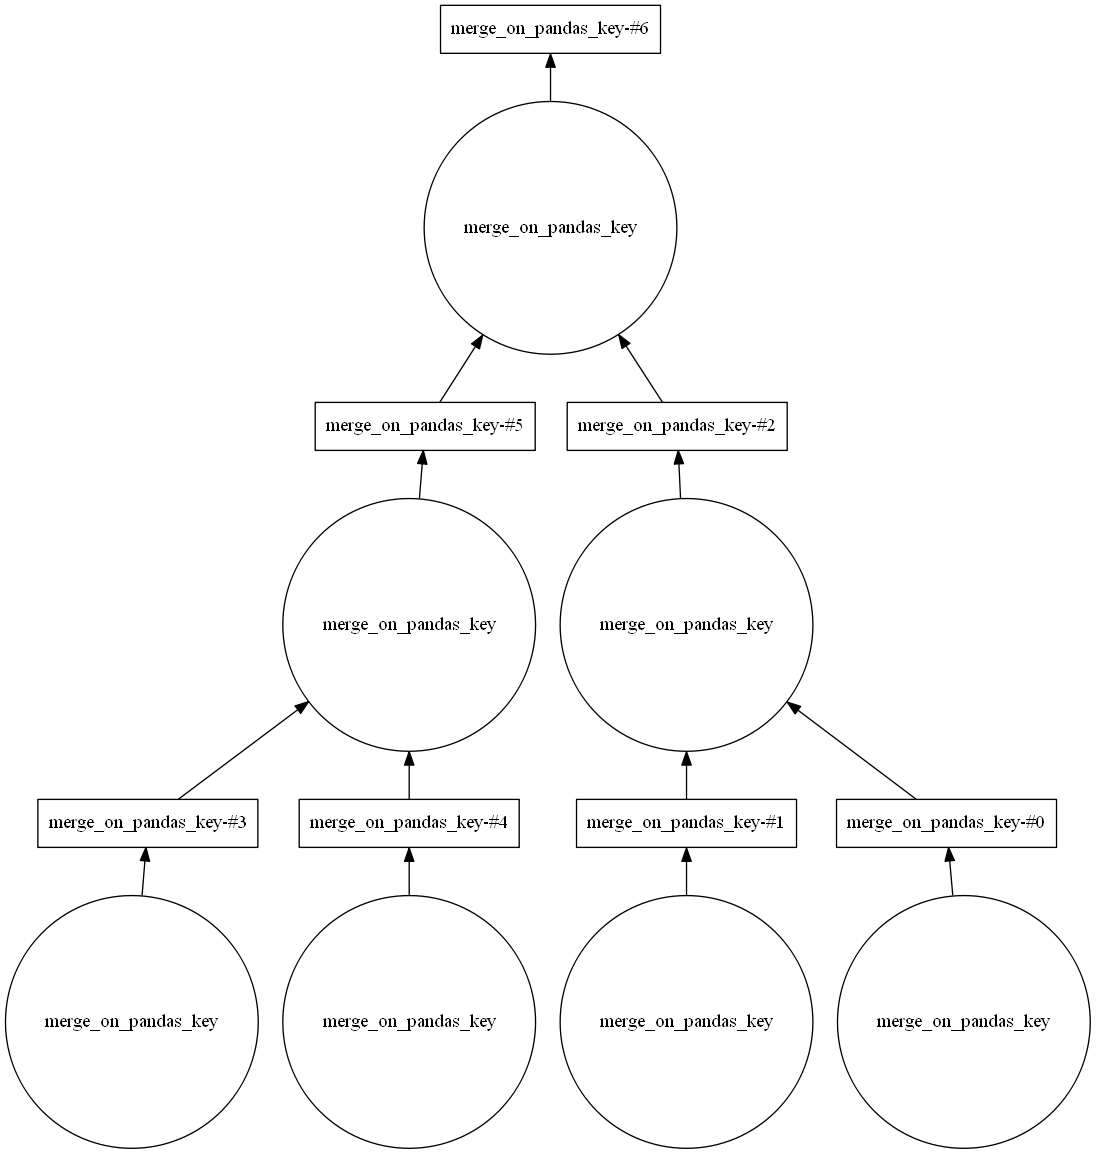

In [23]:
visual.visualize()

In [24]:
visual.compute()

,first,second,third
0,5.0,0.0,-993.0
1,5.0,0.0,-993.0
2,5.0,0.0,-993.0
3,5.0,0.0,-993.0
4,5.0,0.0,-860.0
5,5.0,0.0,-860.0
6,5.0,0.0,-860.0
7,5.0,0.0,-860.0
8,5.0,0.0,-774.0
9,5.0,0.0,-774.0
